# Practical example

## Importing the relevant libraries

In [47]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as v_i_f
import seaborn as sns
sns.set()

## Loading the raw data

In [5]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('1.04. Real-life example.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

## Preprocessing

### Exploring the descriptive statistics of the variables

In [6]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

### Determining the variables of interest

In [7]:
# For these several lessons, we will create the regression without 'Model'
# Certainly, when you work on the problem on your own, you could create a regression with 'Model'
data = raw_data.drop(['Model'],axis=1)

# Let's check the descriptives without 'Model'
data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4345         4345  4345.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          2019         3947          NaN  
mean           NaN          NaN  2006.550058  
std            NaN          NaN     6.719097  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

### Dealing with missing values

In [8]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [9]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is okay
data_no_mv = data.dropna(axis=0)

In [10]:
# Let's check the descriptives without the missing values
data_no_mv.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4025    4025.000000   4025  4025.000000  4025.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1534          NaN          NaN   
mean           NaN   19552.308065    NaN   163.572174     2.764586   
std            NaN   25815.734988    NaN   103.394703     4.935941   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    90.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21900.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         4025         4025  4025.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1861         3654          NaN  
mean           NaN          NaN  2006.379627  
std            NaN          NaN     6.695595  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

### Exploring the PDFs

C:\Users\yorkc\Anaconda3\envs\python_r_jupyter\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


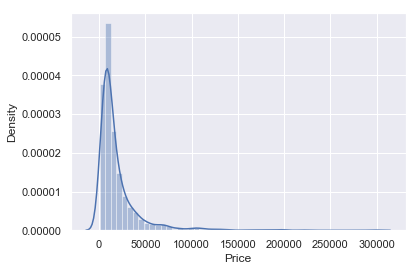

In [11]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [12]:
# Obviously there are some outliers present 

# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3984    3984.000000   3984  3984.000000  3984.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1528          NaN          NaN   
mean           NaN   17837.117460    NaN   165.116466     2.743770   
std            NaN   18976.268315    NaN   102.766126     4.956057   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6980.000000    NaN    93.000000     1.800000   
50%            NaN   11400.000000    NaN   160.000000     2.200000   
75%            NaN   21000.000000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year  
count         3984         3984  3984.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1853         3613          NaN  
mean           NaN          NaN  2006.292922  
std            NaN          NaN     6.672745  
min            NaN          NaN  1969.000000  
25%            NaN          NaN  2002.750000  
50%            NaN          NaN  2007.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

C:\Users\yorkc\Anaconda3\envs\python_r_jupyter\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


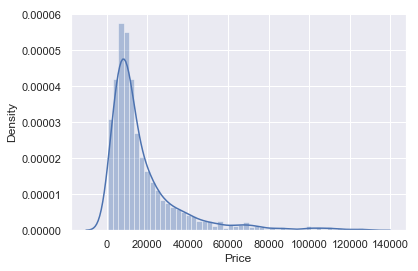

In [13]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.distplot(data_1['Price'])

C:\Users\yorkc\Anaconda3\envs\python_r_jupyter\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


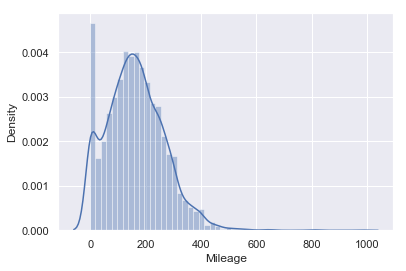

In [14]:
# We can treat the other numerical variables in a similar way
sns.distplot(data_no_mv['Mileage'])

In [15]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\yorkc\Anaconda3\envs\python_r_jupyter\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


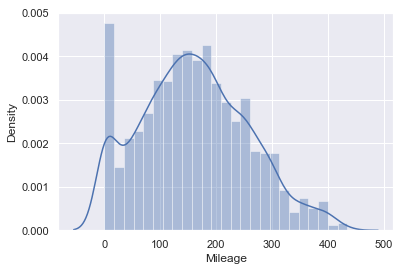

In [16]:
# This plot looks kind of normal, doesn't it?
sns.distplot(data_2['Mileage'])

C:\Users\yorkc\Anaconda3\envs\python_r_jupyter\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


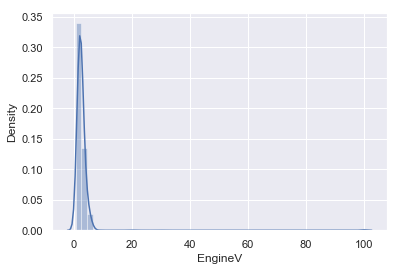

In [17]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.distplot(data_no_mv['EngineV'])

In [18]:
# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_3 = data_2[data_2['EngineV']<6.5]

C:\Users\yorkc\Anaconda3\envs\python_r_jupyter\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


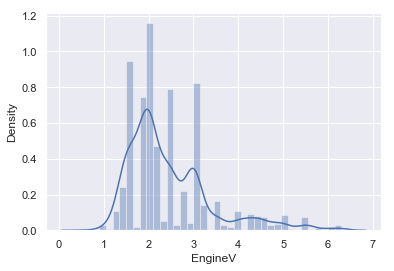

In [19]:
# Following this graph, we realize we can actually treat EngineV as a categorical variable
# Even so, in this course we won't, but that's yet something else you may try on your own
sns.distplot(data_3['EngineV'])

C:\Users\yorkc\Anaconda3\envs\python_r_jupyter\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


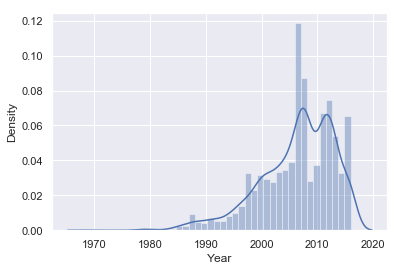

In [20]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end
sns.distplot(data_no_mv['Year'])

In [21]:
# I'll simply remove them
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

C:\Users\yorkc\Anaconda3\envs\python_r_jupyter\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


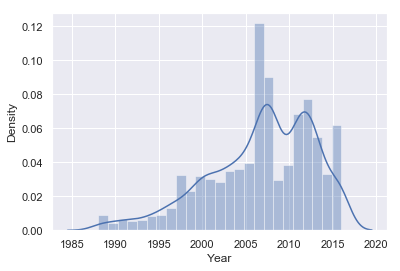

In [22]:
# Here's the new result
sns.distplot(data_4['Year'])

In [23]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)

In [24]:
# Let's see what's left
data_cleaned.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3867    3867.000000   3867  3867.000000  3867.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           848            NaN   1467          NaN          NaN   
mean           NaN   18194.455679    NaN   160.542539     2.450440   
std            NaN   19085.855165    NaN    95.633291     0.949366   
min            NaN     800.000000    NaN     0.000000     0.600000   
25%            NaN    7200.000000    NaN    91.000000     1.800000   
50%            NaN   11700.000000    NaN   157.000000     2.200000   
75%            NaN   21700.000000    NaN   225.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     6.300000   

       Engine Type Registration         Year  
count         3867         3867  3867.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1807         3505          NaN  
mean           NaN          NaN  2006.709853  
std            NaN          NaN     6.103870  
min            NaN          NaN  1988.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2012.000000  
max            NaN          NaN  2016.000000

## Checking the OLS Assumptions

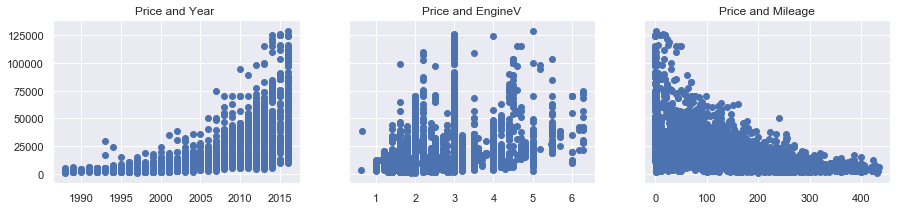

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year ')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

C:\Users\yorkc\Anaconda3\envs\python_r_jupyter\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


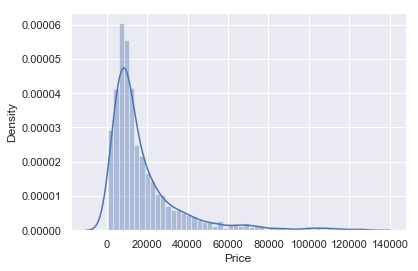

In [26]:
sns.distplot(data_cleaned['Price'])

#log transformations are usful when dealing with the above eponential graph

### Relaxing the Assumptions

In [27]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log Price'] = log_price
data_cleaned

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
3862     Volkswagen   11500.0        van      163      2.5      Diesel   
3863         Toyota   17900.0      sedan       35      1.6      Petrol   
3864  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
3865            BMW    6500.0      sedan        1      3.5      Petrol   
3866     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year  Log Price  
0             yes  1991   8.342840  
1             yes  1999   8.974618  
2             yes  2003   9.495519  
3             yes  2007  10.043249  
4             yes  2011   9.814656  
...           ...   ...        ...  
3862          yes  2008   9.350102  
3863          yes  2014   9.792556  
3864          yes  2014  11.736069  
3865          yes  1999   8.779557  
3866          yes  2013   9.510445  

[3867 rows x 9 columns]

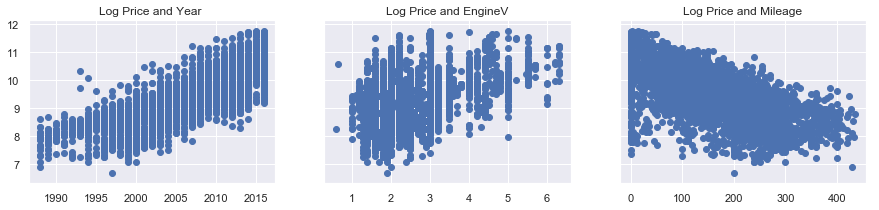

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data_cleaned['Year'],data_cleaned['Log Price'])
ax1.set_title('Log Price and Year ')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['Log Price'])
ax2.set_title('Log Price and EngineV')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['Log Price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [29]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

### Multicullinearity

In [30]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log Price'], dtype=object)

In [31]:
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [v_i_f(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

VIF Features
0   3.791584  Mileage
1  10.354854     Year
2   7.662068  EngineV

### How to Read VIF
#### VIF = 1: No Multicullinearity
#### VIF = 1 < VIF < 5: Perfectly Okay
#### VIF = 10 < VIF: Unacceptable

#### More Information: https://statisticalhorizons.com/multicollinearity

In [32]:
data_no_multicullinearity = data_cleaned.drop(['Year'], axis=1)

## Create Dummy Variables

In [33]:
data_with_dummies = pd.get_dummies(data_no_multicullinearity, drop_first=True)
data_with_dummies.head()

Mileage  EngineV  Log Price  Brand_BMW  Brand_Mercedes-Benz  \
0      277      2.0   8.342840          1                    0   
1      427      2.9   8.974618          0                    1   
2      358      5.0   9.495519          0                    1   
3      240      4.2  10.043249          0                    0   
4      120      2.0   9.814656          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

In [35]:
variables = data_with_dummies[['Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen']]
vif = pd.DataFrame()
vif["VIF"] = [v_i_f(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

VIF             Features
0  0.179487            Brand_BMW
1  0.321854  Brand_Mercedes-Benz
2  0.152318     Brand_Mitsubishi
3  0.407407        Brand_Renault
4  0.485944         Brand_Toyota
5  0.094340     Brand_Volkswagen

### Rearange a Bit

In [36]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [37]:
cols = ['Log Price', 'Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [40]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

Log Price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840      277      2.0          1                    0   
1   8.974618      427      2.9          0                    1   
2   9.495519      358      5.0          0                    1   
3  10.043249      240      4.2          0                    0   
4   9.814656      120      2.0          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

## Linear Regression Model

### Declare the inputs and the targets

In [42]:
targets = data_preprocessed['Log Price']
inputs = data_preprocessed.drop(['Log Price'], axis=1)

### Scale the Data

In [45]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
inputs_scaled = scaler.transform(inputs)

#### Scaling has no effect on the predictive power of dummies, once scaled, though, they lose all their dummy meaning

### Train-Test Split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state=256)

### Create the Log Linear Regression

#### Log Price is a log

In [50]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
y_hat = reg.predict(x_train)

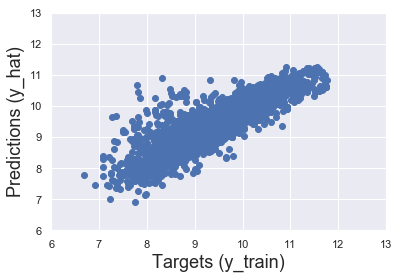

In [53]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

#### Residual = differences between the targets and the predictions

C:\Users\yorkc\Anaconda3\envs\python_r_jupyter\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5,1,'Residuals PDF')

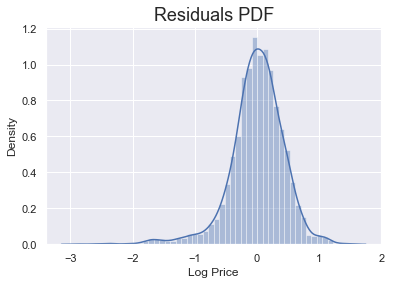

In [55]:
sns.distplot(y_train-y_hat)
plt.title("Residuals PDF", size=18)

In [56]:
reg.score(x_train, y_train)

0.7448003722531366

### Finding weights and bias

In [59]:
reg.intercept_

9.41183144947109

In [60]:
reg.coef_

array([-0.45647815,  0.21094127,  0.01965353,  0.00777111, -0.13813389,
       -0.18322274, -0.05451419, -0.08106272, -0.15106171, -0.10399935,
       -0.1956868 , -0.12234199, -0.16101723, -0.12345203, -0.02950542,
       -0.14761485,  0.31074129])

In [61]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Features   Weights
0               Mileage -0.456478
1               EngineV  0.210941
2             Brand_BMW  0.019654
3   Brand_Mercedes-Benz  0.007771
4      Brand_Mitsubishi -0.138134
5         Brand_Renault -0.183223
6          Brand_Toyota -0.054514
7      Brand_Volkswagen -0.081063
8            Body_hatch -0.151062
9            Body_other -0.103999
10           Body_sedan -0.195687
11           Body_vagon -0.122342
12             Body_van -0.161017
13      Engine Type_Gas -0.123452
14    Engine Type_Other -0.029505
15   Engine Type_Petrol -0.147615
16     Registration_yes  0.310741

## Testing

In [62]:
y_hat_test = reg.predict(x_test)

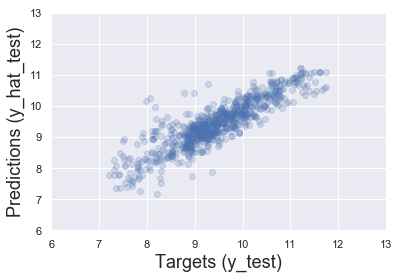

In [65]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [66]:
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

Prediction
0    9.732860
1    8.243350
2   11.060036
3   10.070627
4   10.864122

#### The above proces are in the log form so we need to take the exponent to get the actual value

In [67]:
df_pf_actual = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf_actual.head()

Prediction
0  16862.709190
1   3802.255482
2  63578.868297
3  23638.384249
4  52267.093256

In [68]:
df_pf_actual['Target'] = np.exp(y_test)
df_pf_actual

Prediction   Target
0    16862.709190      NaN
1     3802.255482      NaN
2    63578.868297      NaN
3    23638.384249  23000.0
4    52267.093256  18300.0
..            ...      ...
769   6253.909869   6950.0
770  11352.570102      NaN
771   4950.394276      NaN
772  23856.621494      NaN
773   7615.042039  28700.0

[774 rows x 2 columns]

In [69]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     9.836279
1     7.313220
2    11.225243
3    10.092926
4    11.218554
Name: Log Price, dtype: float64

In [70]:
df_pf_actual['Target'] = np.exp(y_test)
df_pf_actual.head()

Prediction    Target
0    16862.709190  18700.00
1     3802.255482   1500.00
2    63578.868297  75000.00
3    23638.384249  24171.42
4    52267.093256  74500.00
..            ...       ...
769   6253.909869   7500.00
770  11352.570102  15900.00
771   4950.394276   8200.00
772  23856.621494  43000.00
773   7615.042039   7700.00

[774 rows x 2 columns]

In [71]:
df_pf_actual['Residual'] = df_pf_actual['Target'] - df_pf_actual['Prediction']
df_pf_actual.head()

Prediction    Target      Residual
0  16862.709190  18700.00   1837.290810
1   3802.255482   1500.00  -2302.255482
2  63578.868297  75000.00  11421.131703
3  23638.384249  24171.42    533.035751
4  52267.093256  74500.00  22232.906744

In [72]:
df_pf_actual['Difference %'] = np.absolute(df_pf_actual['Residual']/df_pf_actual['Target'] * 100)
df_pf_actual.head()

Prediction    Target      Residual  Difference %
0  16862.709190  18700.00   1837.290810      9.825085
1   3802.255482   1500.00  -2302.255482    153.483699
2  63578.868297  75000.00  11421.131703     15.228176
3  23638.384249  24171.42    533.035751      2.205231
4  52267.093256  74500.00  22232.906744     29.842828

In [73]:
df_pf_actual.describe()

Prediction         Target      Residual  Difference %
count    774.000000     774.000000    774.000000    774.000000
mean   16567.341397   19044.329018   2476.987622     35.211175
std    13370.522121   19858.515702  10795.657679     59.346380
min     1280.647712    1350.000000 -33996.043532      0.058952
25%     7892.066346    7500.000000  -1863.747960     10.301804
50%    12193.846142   12050.000000    344.070406     22.528706
75%    20519.941260   22900.000000   3704.831237     39.691104
max    75045.064193  125000.000000  85057.411028    804.235927

In [75]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf_actual.sort_values(by=['Difference %'])

Prediction    Target  Residual  Difference %
398    14491.45  14500.00      8.55          0.06
736    75045.06  74999.00    -46.06          0.06
116    32462.46  32500.00     37.54          0.12
607    18633.01  18600.00    -33.01          0.18
450    10579.37  10600.00     20.63          0.19
97      3709.73   3700.00     -9.73          0.26
595     9075.18   9100.00     24.82          0.27
158     9827.15   9800.00    -27.15          0.28
475    26975.32  26900.00    -75.32          0.28
302     7824.74   7800.00    -24.74          0.32
596     8377.39   8350.00    -27.39          0.33
674    10837.20  10800.00    -37.20          0.34
216     8941.61   8910.53    -31.08          0.35
448     9041.15   9000.00    -41.15          0.46
708     6963.40   6999.00     35.60          0.51
687     8946.13   8900.00    -46.13          0.52
206    12434.70  12500.00     65.30          0.52
63     12264.48  12200.00    -64.48          0.53
527     2915.94   2900.00    -15.94          0.55
312     3520.87   3500.00    -20.87          0.60
208    12978.79  12900.00    -78.79          0.61
373    12801.98  12900.00     98.02          0.76
476    16072.25  16200.00    127.75          0.79
548    23457.00  23660.00    203.00          0.86
327     5050.07   4999.00    -51.07          1.02
773     7615.04   7700.00     84.96          1.10
32      9592.73   9700.00    107.27          1.11
442    12855.46  13000.00    144.54          1.11
556     6816.21   6900.00     83.79          1.21
18      8691.23   8800.00    108.77          1.24
705     1569.91   1550.00    -19.91          1.28
370     6591.41   6500.00    -91.41          1.41
761    21296.28  21000.00   -296.28          1.41
553     3056.08   3100.00     43.92          1.42
613    30343.80  29900.00   -443.80          1.48
703    75045.06  73900.00  -1145.06          1.55
435     4869.02   4950.00     80.98          1.64
151    41210.83  41900.00    689.17          1.64
547    20976.69  21335.00    358.31          1.68
734     7469.66   7600.00    130.34          1.71
29      3877.49   3950.00     72.51          1.84
46     17174.39  17500.00    325.61          1.86
742    11511.76  11300.00   -211.76          1.87
286     5200.40   5300.00     99.60          1.88
507    17464.29  17800.00    335.71          1.89
210    22264.54  22711.65    447.11          1.97
248    17938.76  18300.00    361.24          1.97
499    17848.50  17500.00   -348.50          1.99
432    15090.42  15400.00    309.58          2.01
381     6367.79   6500.00    132.21          2.03
3      23638.38  24171.42    533.04          2.21
21      7528.97   7700.00    171.03          2.22
511    25470.56  24900.00   -570.56          2.29
663     9751.19   9990.00    238.81          2.39
471     7168.52   6999.00   -169.52          2.42
38      4581.50   4700.00    118.50          2.52
261    15694.08  15300.00   -394.08          2.58
535    10979.06  10700.00   -279.06          2.61
307    36887.67  37900.00   1012.33          2.67
230    41068.38  39999.00  -1069.38          2.67
420    28704.11  29500.00    795.89          2.70
194    12532.45  12200.00   -332.45          2.72
90     29153.16  28350.00   -803.16          2.83
561     2040.34   2100.00     59.66          2.84
516    28110.48  28950.00    839.52          2.90
250    46829.61  45500.00  -1329.61          2.92
129    15131.15  14700.00   -431.15          2.93
201    50364.01  48900.00  -1464.01          2.99
153     8528.90   8800.00    271.10          3.08
461    30000.27  31000.00    999.73          3.22
564    16906.84  17500.00    593.16          3.39
296     5169.79   5000.00   -169.79          3.40
458    12556.22  13000.00    443.78          3.41
339    11172.11  10800.00   -372.11          3.45
473     5177.29   5000.00   -177.29          3.55
168     9836.84  10200.00    363.16          3.56
642     5930.88   6150.00    219.12          3.56
361    14088.17  13600.00   -488.17          3.59
6       3734.35   3600.00   -134.35          3.73
478  